In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers.core import Dense, Activation

In [9]:
import csv

In [16]:
data = []
with open('data/newsample.csv', 'r', encoding='iso-8859-1') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row[: 26])
        
data = pd.DataFrame(np.array(data))

In [17]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1,E0,14/08/04,Aston Villa,Southampton,2,0,H,2,0,H,...,9,12,6,0,0,0,0,1.9,3.1,4.33
2,E0,14/08/04,Blackburn,West Brom,1,1,D,0,1,A,...,17,4,5,1,0,0,0,1.8,3.1,5
3,E0,14/08/04,Bolton,Charlton,4,1,H,2,0,H,...,12,9,5,1,1,0,0,2.25,3.2,3.1
4,E0,14/08/04,Man City,Fulham,1,1,D,1,0,H,...,12,9,4,0,2,0,0,2.1,3.25,3.4
5,E0,14/08/04,Middlesbrough,Newcastle,2,2,D,0,1,A,...,13,6,7,3,1,0,0,2.3,3.25,3
6,E0,14/08/04,Norwich,Crystal Palace,1,1,D,1,0,H,...,16,6,11,0,1,0,0,2.1,3.25,3.4
7,E0,14/08/04,Portsmouth,Birmingham,1,1,D,1,1,D,...,16,8,4,2,4,0,0,2.4,3.2,2.87
8,E0,14/08/04,Tottenham,Liverpool,1,1,D,0,1,A,...,11,3,8,3,1,0,0,3.1,3.2,2.25
9,E0,15/08/04,Chelsea,Man United,1,0,H,1,0,H,...,8,2,3,0,0,0,0,2.1,3.25,3.4


In [18]:
fixture = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool') and (row[2] == 'Aston Villa' or row[3] == 'Aston Villa'):
            fixture.append(row) 
    
    x += 10
    size += 10


fixture = pd.DataFrame(fixture)

In [19]:
fixture

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
151,E0,04/12/04,Aston Villa,Liverpool,1,1,D,1,1,D,...,10,3,9,1,0,0,0,2.5,3.2,2.75
375,E0,15/05/05,Liverpool,Aston Villa,2,1,H,2,0,H,...,16,9,5,0,0,0,0,1.66,3.4,5.5


In [20]:
fixtures = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            if row[2] == 'Liverpool':
                row.drop([3, 5, 6, 8, 9, 10, 12, 14, 16, 18, 20, 22, 23, 24, 25], inplace=True)
                row = [x for x in row if x != 'NaN']
                fixtures.append(row) 
                
            elif row[3] == 'Liverpool':
                row.drop([2, 4, 6, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23, 24, 25], inplace=True)
                row = [x for x in row if x != 'NaN']
                fixtures.append(row) 
            
    x += 10
    size += 10


fixtures = pd.DataFrame(fixtures)

In [83]:
fixtures

,0,1,2,3,4,5,6,7,8,9,10
0,E0,14/08/04,Liverpool,1,1,16,8,11,8,1,0
1,E0,21/08/04,Liverpool,2,0,15,10,9,8,1,0
2,E0,29/08/04,Liverpool,0,0,7,2,14,2,0,0
3,E0,11/09/04,Liverpool,3,2,16,9,9,8,0,0
4,E0,20/09/04,Liverpool,1,0,6,3,15,2,2,0
5,E0,25/09/04,Liverpool,3,2,20,12,10,4,1,0
6,E0,03/10/04,Liverpool,0,0,5,3,20,2,1,0
7,E0,16/10/04,Liverpool,4,0,10,3,14,6,3,1
8,E0,23/10/04,Liverpool,2,0,17,7,9,12,0,0
9,E0,30/10/04,Liverpool,2,1,13,9,11,6,1,0


In [23]:
fixtures = []

x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        
        record = np.empty(9, dtype=object)
        
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            
            row = row.tolist()
            record[0] = row[1].split('/')[1]
            
            if row[2] == 'Liverpool':
                record[1] = 1
                
                if row[9] == 'A': record[4] = 0 
                elif row[9] == 'H': record[4] = 3
                else: record[4] = 1
                    
            elif row[3] == 'Liverpool':
                record[1] = 0
                
                if row[9] == 'A': record[4] = 3 
                elif row[9] == 'H': record[4] = 0
                else: record[4] = 1
            
            record[2] = row[7]
            record[3] = row[8]
            record[5] = row[23]
            record[6] = row[24]
            record[7] = row[25]
            record[8] = row[4]
            
            fixtures.append(record)
            
            
    x += 10
    size += 10


fixtures = pd.DataFrame(fixtures)

In [24]:
fixtures

,0,1,2,3,4,5,6,7,8
0,08,0,0,1,3,3.1,3.2,2.25,1
1,08,1,0,1,0,1.57,3.5,6.5,2
2,08,0,1,0,0,3.2,3.25,2.2,1
3,09,1,2,0,3,1.444,3.75,8.5,3
4,09,0,1,0,0,2,3.2,3.75,2
5,09,1,2,0,3,1.4,4,9,3
6,10,0,0,0,1,1.8,3.1,5,1
7,10,0,2,0,0,3.4,3.25,2.1,2
8,10,1,0,0,1,1.5,3.6,7.5,2
9,10,0,2,1,0,5,3.1,1.8,2


In [34]:
dataset = fixtures.astype('float64').values
X = dataset[:,0:8]
Y = dataset[:,8:]

array([[ 8.   ,  0.   ,  0.   ,  1.   ,  3.   ,  3.1  ,  3.2  ,  2.25 ],
       [ 8.   ,  1.   ,  0.   ,  1.   ,  0.   ,  1.57 ,  3.5  ,  6.5  ],
       [ 8.   ,  0.   ,  1.   ,  0.   ,  0.   ,  3.2  ,  3.25 ,  2.2  ],
       [ 9.   ,  1.   ,  2.   ,  0.   ,  3.   ,  1.444,  3.75 ,  8.5  ],
       [ 9.   ,  0.   ,  1.   ,  0.   ,  0.   ,  2.   ,  3.2  ,  3.75 ],
       [ 9.   ,  1.   ,  2.   ,  0.   ,  3.   ,  1.4  ,  4.   ,  9.   ],
       [10.   ,  0.   ,  0.   ,  0.   ,  1.   ,  1.8  ,  3.1  ,  5.   ],
       [10.   ,  0.   ,  2.   ,  0.   ,  0.   ,  3.4  ,  3.25 ,  2.1  ],
       [10.   ,  1.   ,  0.   ,  0.   ,  1.   ,  1.5  ,  3.6  ,  7.5  ],
       [10.   ,  0.   ,  2.   ,  1.   ,  0.   ,  5.   ,  3.1  ,  1.8  ],
       [11.   ,  1.   ,  0.   ,  0.   ,  1.   ,  1.5  ,  3.6  ,  7.5  ],
       [11.   ,  1.   ,  2.   ,  1.   ,  3.   ,  1.5  ,  3.5  ,  8.   ],
       [11.   ,  0.   ,  1.   ,  0.   ,  0.   ,  2.5  ,  3.2  ,  2.75 ],
       [11.   ,  1.   ,  1.   ,  0.   ,  3.   ,  3.

In [75]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Activation('linear'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [120]:
x = model.fit(X, Y, epochs=15, batch_size=8, validation_split = 0.3)
score = model.evaluate(X, Y, batch_size=8)
preds = model.predict(X)

Train on 26 samples, validate on 12 samples
Epoch 1/15
26/26 [==============================] - 0s 366us/step - loss: 0.4519 - val_loss: 0.4585
Epoch 2/15
26/26 [==============================] - 0s 349us/step - loss: 0.4473 - val_loss: 0.4606
Epoch 3/15
26/26 [==============================] - 0s 431us/step - loss: 0.4446 - val_loss: 0.4612
Epoch 4/15
26/26 [==============================] - 0s 528us/step - loss: 0.4446 - val_loss: 0.4618
Epoch 5/15
26/26 [==============================] - 0s 537us/step - loss: 0.4447 - val_loss: 0.4623
Epoch 6/15
26/26 [==============================] - 0s 520us/step - loss: 0.4451 - val_loss: 0.4625
Epoch 7/15
26/26 [==============================] - 0s 552us/step - loss: 0.4446 - val_loss: 0.4626
Epoch 8/15
26/26 [==============================] - 0s 592us/step - loss: 0.4448 - val_loss: 0.4631
Epoch 9/15
26/26 [==============================] - 0s 576us/step - loss: 0.4448 - val_loss: 0.4631
Epoch 10/15
26/26 [==============================] - 0s 

In [121]:
preds[1:5]

array([[0.8509924],
       [1.2747822],
       [2.974653 ],
       [1.4512885]], dtype=float32)

In [82]:
Y[1:5]

array([[2.],
       [1.],
       [3.],
       [2.]])

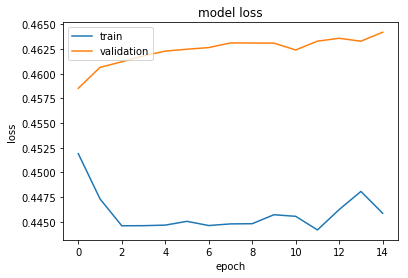

In [122]:
plt.plot(x.history['loss'])
plt.plot(x.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()